# Exercise 18 a)

Write a function min list() that, given a list of points in R2, returns a minimal list of
points that have the same convex hull as the given list. (5 points) 

Test for L1, L2, L3

In [315]:
L1 = [[0.0, 0.0], [7.0, 0.0], [3.0, 1.0], [5.0, 2.0], [5.0, 5.0], [3.0, 3.0], [1.0, 4.0], [9.0, 6.0]]
L2 = [[0.0, 1.0], [1.0, 0.0], [3.0, 1.0], [2.5, 2.0], [1.5,1.0], [1.0,3.0], [1.5,1.5]] 
L3 =[[0.5,0.5], [1.0,1.0], [0.0,0.5], [1.0,1.5], [0.5,2.0], [1.0,0.5]]

In [298]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Function for finding convex hull

In [316]:
def hull(points):
    """Function to plot the convex hull"""
    combinations = []
    convex_hull = []

    for p1 in points:
        for p2 in points:
            combinations.append([p1, p2])
    
    for combination in combinations:
        if combination[0] != combination[1]:
            on_left = 0
            for p in points:
                val = ((combination[1][0] - combination[0][0])*(p[1] - combination[0][1]) - (combination[1][1] - combination[0][1])*(p[0] - combination[0][0]))
                thresh = 1e-9
                if val <= -thresh:
                    continue
                else:
                    on_left +=1
        
            if on_left == (len(points)):
                convex_hull.append(combination[0])
                convex_hull.append(combination[1])
                
        else:
            continue
        
    return convex_hull

        

### Function for excluding points lying on the lines of convex hull

In [317]:
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def is_between(p1, p2, p3):
    return distance(p1, p3) + distance(p3, p2) == distance(p1, p2)

In [318]:
def removing_on_line(points):
    points_in_between = []

    for p1 in points:
        for p2 in points:
            for p3 in points:
                if p1 != p2 and p2 != p3 and p1 != p3:
                    if is_between(p1, p2, p3) == True:
                        points_in_between.append(p3) 
                    
    return points_in_between

### Function returning a minimal list of points that have the same convex hull as the given list

In [335]:
def min_list(points):
    convex_hull = hull(points)
    excluded_points = removing_on_line(convex_hull)
    min_list_hull = [k for k in convex_hull if k not in excluded_points]
    
    # removing duplicates
    min_el = []
    for el in min_list_hull:
        if el not in min_el:
            min_el.append(el)
    
    return min_el

## Solution for L1

In [336]:
min_list_L1 = min_list(L1)
print(min_list_L1)

[[0.0, 0.0], [7.0, 0.0], [9.0, 6.0], [1.0, 4.0]]


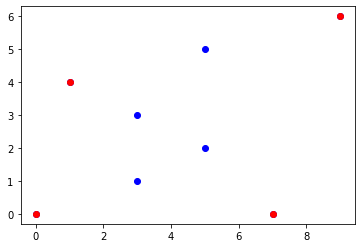

In [337]:
for point in L1:
    plt.scatter(point[0], point[1], c = 'blue')
    
for p in min_list_L1:
    plt.scatter(p[0], p[1], c = 'red')
    
plt.show()

## Solution for L2

In [338]:
min_list_L2 = min_list(L2)
print(min_list_L2)

[[0.0, 1.0], [1.0, 0.0], [3.0, 1.0], [2.5, 2.0], [1.0, 3.0]]


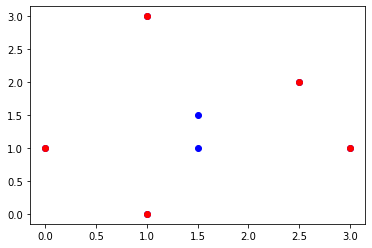

In [339]:
for point in L2:
    plt.scatter(point[0], point[1], c = 'blue')
    
for p in min_list_L2:
    plt.scatter(p[0], p[1], c = 'red')
    
plt.show()

## Solution for L3

In [341]:
min_list_L3 = min_list(L3)
print(min_list_L3)

[[1.0, 0.5], [1.0, 1.5], [0.0, 0.5], [0.5, 2.0]]


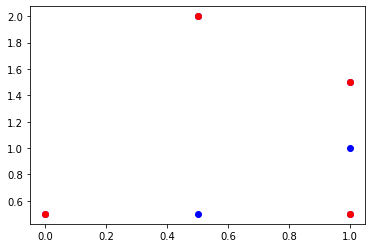

In [342]:
for point in L3:
    plt.scatter(point[0], point[1], c = 'blue')
    
for p in min_list_L3:
    plt.scatter(p[0], p[1], c = 'red')
    
plt.show()

# Exercise 18 b)
Write a function is in convex hull() that, given a list of points in R2 and another single point P ∈ R2 (in that order), returns true if P lies in the convex hull of the other points, and false otherwise. (3 points) 

In [375]:
def is_in_convex_hull(points, point):
    convex_hull = min_list(points) # list of points that make a convex hull
            
    on_left = 0
    for i in range(len(convex_hull)-1):
        val = ((convex_hull[i+1][0] - convex_hull[i][0])*(point[1] - convex_hull[i][1]) - (convex_hull[i+1][1] - convex_hull[i][1])*(point[0] - convex_hull[i][0]))
        thresh = 1e-9
        if val <= -thresh:
            return False
        else:
            on_left +=1
    
    # Edge case
    # Does the point lie between last and first element of convex hull?
    val = ((convex_hull[0][0] - convex_hull[-1][0])*(point[1] - convex_hull[-1][1]) - (convex_hull[0][1] - convex_hull[-1][1])*(point[0] - convex_hull[-1][0]))
    thresh = 1e-9
    if val <= -thresh:
        return False
    else:
        on_left +=1
                    
    return on_left == len(convex_hull)
    

## Solution for P1 = (−1.0, 4.0)

In [376]:
p1 = [-1.0, 4.0]

In [378]:
p1_L1 = is_in_convex_hull(L1, p1)
print("Point P1 in L1: " + str(p1_L1))

p1_L2 = is_in_convex_hull(L2, p1)
print("Point P1 in L2: " + str(p1_L2))

p1_L3 = is_in_convex_hull(L3, p1)
print("Point P1 in L3: " + str(p1_L3))

Point P1 in L1: False
Point P1 in L2: False
Point P1 in L3: False


## Solution for P2 = (0.5, 0.5)

In [385]:
p2 = [0.5, 0.5]

In [386]:
p2_L1 = is_in_convex_hull(L1, p2)
print("Point P2 in L1: " + str(p2_L1))

p2_L2 = is_in_convex_hull(L2, p2)
print("Point P2 in L2: " + str(p2_L2))

p2_L3 = is_in_convex_hull(L3, p2)
print("Point P2 in L3: " + str(p2_L3))

Point P2 in L1: True
Point P2 in L2: True
Point P2 in L3: False


## Solution for P3 = (5.0, 3.0)

In [383]:
p3 = [5.0, 3.0]

In [384]:
p3_L1 = is_in_convex_hull(L1, p3)
print("Point P3 in L1: " + str(p3_L1))

p3_L2 = is_in_convex_hull(L2, p3)
print("Point P3 in L2: " + str(p3_L2))

p3_L3 = is_in_convex_hull(L3, p3)
print("Point P3 in L3: " + str(p3_L3))

Point P3 in L1: True
Point P3 in L2: False
Point P3 in L3: False
